# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [33]:
### Type your code here
### Type your code here
transactions = pd.read_csv("Python And Data Analysis/data/transactions.csv", sep = ',', nrows = 1000000)
gender_train = pd.read_csv("Python And Data Analysis/data/gender_train.csv", sep = ',')
tr_mcc_codes = pd.read_csv("Python And Data Analysis/data/tr_mcc_codes.csv", sep = ';')
tr_types = pd.read_csv("Python And Data Analysis/data/tr_types.csv", sep = ';')

#### Task 0.
Соедините transactions со всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо "смёрджиться" с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

## Описание данных
### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

In [34]:
### Type your code here
step_one = pd.merge(transactions, gender_train, how = 'left', left_on='customer_id', right_on='customer_id')
step_two = pd.merge(step_one, tr_mcc_codes, left_on='mcc_code', right_on='mcc_code')
transactions = pd.merge(step_two, tr_types, left_on='tr_type', right_on='tr_type')
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
5,39026145,11 14:15:30,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

#### Ответ
1) 32718.05
?? возмно здесь нужно сначала определить общие расходы для каждого мужчины/женцины, а затем посчитать среднее значение. Я же посчитал только среднюю транзакцию для мужчин и для женцин

2) 16020897.70 - среднее по всем периодам для ФЛ


##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

In [36]:
### Type your code here
a,b = transactions[transactions['amount']<0].groupby(['gender'])['amount'].agg('mean')
abs(a-b)

32718.05492021877

In [29]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999584 entries, 0 to 999583
Data columns (total 9 columns):
customer_id        999584 non-null int64
tr_datetime        999584 non-null object
mcc_code           999584 non-null int64
tr_type            999584 non-null int64
amount             999584 non-null float64
term_id            577482 non-null object
gender             600086 non-null float64
mcc_description    999584 non-null object
tr_description     999584 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 76.3+ MB


In [64]:
# Если посчитаем совокупную сумму расходов для мужчин и для женцин
sum_customers_id = transactions[transactions['amount']<0].groupby(['customer_id','gender'])['amount'].agg('sum')
sum_customers_id = sum_customers_id.to_frame()
sum_customers_id = sum_customers_id.reset_index()
a,b = sum_customers_id.groupby(['gender'])['amount'].agg('mean')
abs(a-b)

16020897.700965222

In [70]:
#sns.pairplot(sum_customers_id)
sum_customers_id.groupby(['gender'])['amount'].mean().round()


gender
0.0   -20838842.0
1.0   -36859740.0
Name: amount, dtype: float64

In [74]:
sum_customers_id[sum_customers_id['gender'] == 1]['amount'].mean()

-36859740.02441718

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Для получившегося столбца определите дисперсию сумм трат тех категорий, в которых не менее 10 наблюдений.
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.
#### Ответ
9170599

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соовтетствующие серии.     Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

In [92]:
### Type your code here
transactions['mcc_code+tr_type'] = transactions['mcc_code'].astype(str) + transactions['tr_type'].astype(str)
#transactions[['mcc_code','tr_type','mcc_code+tr_type']]

In [114]:
#Вариант 1 
#transactions['mcc_code+tr_type']
#f_count = lambda x: 
transactions['count_in_group'] = transactions.groupby('mcc_code+tr_type')['amount'].transform('count')
stat = transactions[transactions['count_in_group']>=10]
statfinal = stat.groupby('mcc_code+tr_type')['amount'].agg('var')
statfinal.max() / statfinal.min()
#transactions[transactions['mcc_code+tr_type'] == '60107041'] #смотрим корректность расчета по группам

9170599.00280999

In [119]:
#Вариант 2
f_count = lambda x: x['amount'].count() >= 10
stat = transactions.groupby('mcc_code+tr_type').filter(f_count)
statfinal = stat.groupby('mcc_code+tr_type')['amount'].agg('var')
statfinal.max() / statfinal.min()
#transactions[transactions['mcc_code+tr_type'] == '60107041'] #смотрим корректность расчета по группам

9170599.00280999

#### Task 3:
1. Для каждого пола выделите 5 типов транзакций, по которым максимальная сумма прихода на карту (строго положительная) была минимальной среди всех типов. (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

#### Ответ 
5

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [231]:
### Type your code here
max_tr = pd.DataFrame(transactions[transactions['amount'] > 0].groupby(['gender','tr_type'])['amount'].agg('max'))
max_tr.reset_index(inplace = True)

max_tr.sort_values(by=['gender','amount'], ascending=[True, True]).groupby(['gender']).head(5).sort_values(by=['tr_type'])

,gender,tr_type,amount
38,1.0,1010,28803.87
44,1.0,2020,2245.92
9,0.0,2370,2335.75
10,0.0,4051,1122.96
11,0.0,4100,5041.86
12,0.0,4110,2245.92
47,1.0,4110,2245.92
13,0.0,4210,2245.92
48,1.0,6000,79280.83
71,1.0,8100,64682.37


In [236]:
#Проверка полученных результатов
transactions[(transactions['tr_type'] == 4110) & (transactions['amount'] >0)].head(2)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type,count_in_group
713566,14808847,56 00:00:00,6011,4110,2245.92,NaN,0.0,Финансовые институты — снятие наличности автом...,Плата за получение наличных в АТМ. Россия,60114110,1271
713615,99048480,174 00:00:00,6011,4110,2245.92,NaN,1.0,Финансовые институты — снятие наличности автом...,Плата за получение наличных в АТМ. Россия,60114110,1271


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75.
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины 
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин 
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских 
    
#### Ответ 
Мужчины - 1,

М чуть больше тратят на цветы -3

По финансам нет информации

М больше бухают -5

    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можно использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [123]:
### Type your code here
transactions['tr_day'] = transactions['tr_datetime'].apply(lambda x: x[:x.find(" ")])
transactions['tr_day'] = transactions['tr_day'].astype('int64')
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,mcc_count
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,1
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,1
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,1
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,1
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,1


In [124]:
#Отфильтруйте строки таким образом, чтобы оставить только те транзакции, 
#у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакция

In [125]:
stat_mcc = transactions.groupby(['tr_type','tr_day'])
transactions['mcc_count'] = stat_mcc['mcc_code'].transform('nunique')

In [126]:
#Проверка расчета
transactions[(transactions['mcc_count'] == 2) & 
             (transactions['tr_day'] == 19) &
             (transactions['tr_type'] == 1030)
            ]['mcc_code'].value_counts()

4814    315
4899      1
Name: mcc_code, dtype: int64

In [187]:
research_gender = transactions[transactions['mcc_count']>50].groupby(['mcc_description','gender'])['amount'].agg(['count','nunique','median'])
#research_gender.sort_values(by=['count'], ascending=False).head(20)
research_gender.sort_values(by=['count'], ascending=False)

count  nunique  \
mcc_description                                    gender                   
Бакалейные магазины, супермаркеты                  1.0      1779     1519   
                                                   0.0      1722     1580   
Станции техобслуживания                            1.0       643      502   
Различные продовольственные магазины — рынки, м... 1.0       333      296   
Рестораны, закусочные                              1.0       278      223   
Места общественного питания, рестораны             1.0       231      188   
Различные продовольственные магазины — рынки, м... 0.0       224      210   
Станции техобслуживания                            0.0       197      158   
Рестораны, закусочные                              0.0       170      145   
Аптеки                                             0.0       161      159   
Магазины косметики                                 0.0       143      140   
Аптеки                                             1.0       137      130   
Места общественного питания, рестораны             0.0       135      122   
Универмаги                                         0.0        89       85   
                                                   1.0        86       83   
Садовые принадлежности (в том числе для ухода з... 1.0        83       83   
Магазины мужской и женской одежды                  0.0        78       73   
Лесо- и строительный материал                      1.0        70       69   
Магазины спорттоваров                              0.0        66       64   
Обувные магазины                                   0.0        64       61   
Магазины спорттоваров                              1.0        62       62   
Универсальные магазины                             0.0        60       59   
Плавательные бассейны — распродажа                 0.0        60       56   
Различные магазины одежды и аксессуаров            0.0        59       51   
Автозапчасти и аксессуары                          1.0        56       53   
Магазины косметики                                 1.0        53       48   
Магазины с продажей спиртных напитков на вынос ... 1.0        53       52   
Плавательные бассейны — распродажа                 1.0        50       49   
Садовые принадлежности (в том числе для ухода з... 0.0        46       45   
Бытовое оборудование                               1.0        43       42   
...                                                          ...      ...   
Авиалинии, авиакомпании                            1.0         1        1   
Таймшер                                            0.0         1        1   
Лимузины и такси                                   1.0         1        1   
Бизнес-сервис                                      1.0         1        1   
Билльярд-клубы                                     0.0         1        1   
Больницы                                           1.0         1        1   
Ветеринарные услуги                                0.0         1        1   
                                                   1.0         1        1   
Галереи/учреждения видеоигр                        1.0         1        1   
Генеральные подрядчики по вентиляции, теплоснаб... 1.0         1        1   
Драгоценные камни и металлы, часы и ювелирные и... 0.0         1        1   
Звонки с использованием телефонов, считывающих ... 0.0         1        1   
Иной сервис                                        1.0         1        1   
Канцелярия, офисные сопутствующие товары, бумаг... 0.0         1        1   
Компьютерная сеть/информационные услуги            1.0         1        1   
Магазины художественных и ремесленных изделий      1.0         1        1   
Спортивная одежда, одежда для верховой езды и е... 0.0         1        1   
Нефть и нефтепродукты                              1.0         1        1   
Оборудование для водопровода и отопительной сис... 0.0         1        1   
Общий ремонт                                       0.0 

In [199]:
research_gender = pd.DataFrame(research_gender.reset_index())
research_gender[research_gender['mcc_description'] == 'Флористика']

,mcc_description,gender,count,nunique,median
206,Флористика,0.0,11,11,-17762.95
207,Флористика,1.0,19,18,-17881.98


In [200]:
#'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков'
research_gender[research_gender['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков']

,mcc_description,gender,count,nunique,median
12,"Бары, коктейль-бары, дискотеки, ночные клубы и...",0.0,6,6,-11566.465
13,"Бары, коктейль-бары, дискотеки, ночные клубы и...",1.0,27,25,-19764.060


In [169]:
tr_mcc_codes['stok'] = tr_mcc_codes['mcc_description'].apply(lambda x: 'бума' in x)
tr_mcc_codes[tr_mcc_codes['stok'] == True]


,mcc_code,mcc_description,stok
36,5111,"Канцелярия, офисные сопутствующие товары, бума...",True
127,6211,Ценные бумаги: брокеры/дилеры,True


In [201]:
#research_gender.xs("Ценные бумаги: брокеры/дилеры")

#xs('Ценные бумаги: брокеры/дилеры')
#'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков'
research_gender[research_gender['mcc_description'] == 'Ценные бумаги: брокеры/дилеры']

,mcc_description,gender,count,nunique,median


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесится к категории 'Income'.
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими. 
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами. 
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. 

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07.

In [223]:
#Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":".

#x=transactions['tr_datetime'][0]
#x[x.find(":")-2:x.find(":")]
#transactions['tr_datetime'].apply(lambda x: x[x.find(":")-2:x.find(":")])

transactions['tr_hour'] = transactions['tr_datetime'].apply(lambda x: x[x.find(":")-2:x.find(":")])
transactions['tr_hour'] = transactions['tr_hour'].astype('int64')
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,mcc_count,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,1,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,1,7
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,1,7
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,1,8
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,1,14


In [236]:
#Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), 
#разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (*)
transactions_minus = transactions[transactions['amount']<0]
transactions_minus['amount_bucket'] = pd.qcut(transactions_minus['amount'], q=[0, .2, .4, .6, .8, 1], labels=['Very_High', 'High', 'Middle', 'Low', 'Very_Low'])
transactions_minus.head(5)

transactions_income = transactions[transactions['amount']>0]
transactions_income['amount_bucket'] = 'Income'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [244]:
print(transactions_income.info())
print(transactions_minus.info())
print(pd.concat([transactions_income, transactions_minus],axis=0).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230939 entries, 119094 to 999583
Data columns (total 13 columns):
customer_id        230939 non-null int64
tr_datetime        230939 non-null object
mcc_code           230939 non-null int64
tr_type            230939 non-null int64
amount             230939 non-null float64
term_id            134413 non-null object
gender             171321 non-null float64
mcc_description    230939 non-null object
tr_description     230939 non-null object
tr_day             230939 non-null int64
mcc_count          230939 non-null int64
tr_hour            230939 non-null int64
amount_bucket      230939 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 24.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768645 entries, 0 to 999566
Data columns (total 13 columns):
customer_id        768645 non-null int64
tr_datetime        768645 non-null object
mcc_code           768645 non-null int64
tr_type            768645 non-null int6

In [245]:
#После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
pvt = pd.concat([transactions_income, transactions_minus],axis=0).pivot_table('gender', index=['tr_hour'], columns='amount_bucket', aggfunc='mean')

In [233]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

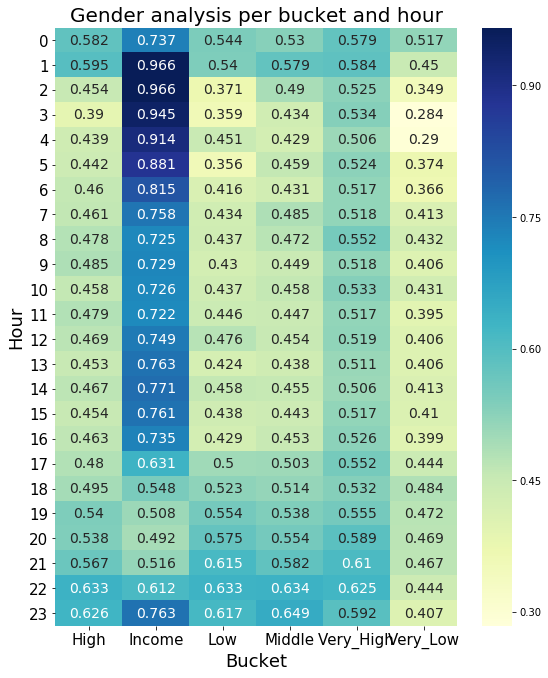

In [246]:
# Type your code here
plot_pivot_table(pvt)

- 1) + Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими. 
- 2) - Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
- 3) + Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами. 
- 4) - Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
- 5) + Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. 

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами 
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения) 
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних 
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [ ]:
# Type your code here